In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
class SRM:
    def __init__(self, threshold, tau_m, tau_s, K1, K2, dt, window_size, tref, verbose=True) -> None:
        """_summary_

        Args:
            threshold (_type_): _description_
            tau_m (_type_): _description_
            tau_s (_type_): _description_
            K (_type_): _description_
            K1 (_type_): _description_
            K2 (_type_): _description_
            window_size (_type_): _description_
            verbose (bool, optional): _description_. Defaults to True.
        """
        self.threshold = threshold
        self.tau_m = tau_m
        self.tau_s = tau_s
        self.K1 = K1
        self.K2 = K2
        self.dt = dt
        self.window_size = window_size
        self.tref = tref
        self.verbose = verbose 
    
    def plot_kernel_(self, kernel, range, step_size):
        r = np.arange(0,range,step_size)
        if kernel == 'eta':
            plt.plot(r/self.dt,self.eta_kernel(r), label=r'$\eta$ kernel')
            plt.plot(r/self.dt,self.eta_kernel(r), 'xr')
            plt.axhline(0, linestyle='-', color='black')
            plt.axhline(min(self.eta_kernel(r)), linestyle='-.', color='black', label='minimum vlaue')
            plt.axhline(max(self.eta_kernel(r)), linestyle='-.', color='gray', label='maximum value')
            plt.xlabel(r'$t - t_i$ (ms)')
            plt.ylabel(r'$\eta (t - t_i)$ kernel')
            plt.legend()
            
        elif kernel == 'eps':
            plt.plot(r/self.dt, self.eps_kernel(r), '--k', label=r'$\varepsilon$ kernel')
            plt.plot(r/self.dt,self.eps_kernel(r), 'xr')
            plt.axhline(0, linestyle='-.', color='black', label='minimum vlaue')
            plt.axhline(1, linestyle='-.', color='gray', label='maximum value')
            plt.xlabel(r'$t - t_j$ (ms)')
            plt.ylabel(r'$\varepsilon (t - t_j)$ kernel')
            plt.legend()
        else:
            raise ValueError(f"kernel must be either 'eta' or 'eps' ")

    def eps_kernel(self, s):
        '''
        s = t - t_j 
        time difference between current time and spike time of presynaptic neuron (t_j)
        '''
        # K = find_max_and_K(tau_m,tau_s) # k defined in formual of epsilon in the paper
        # Choose K such that the maximum value of epsilon kernel will be 1.
        s_max = (self.tau_m * self.tau_s) / (self.tau_s - self.tau_m) * np.log(self.tau_s / self.tau_m)
        max_val = (np.exp(-s_max/self.tau_m) - np.exp(-s_max/self.tau_s))
        self.K = 1 / max_val
        return self.K * (np.exp(-s/self.tau_m) - np.exp(-s/self.tau_s))
    
    def eta_kernel(self, s):
        # TODO: figure out if T is actually the threshold value
        T = self.threshold
        positive_pulse = self.K1 * np.exp(-s/self.tau_m)
        negative_spike_afterpotential = self.K2 * (np.exp(-s/self.tau_m) - np.exp(-s/self.tau_s))
        return T * (positive_pulse - negative_spike_afterpotential)

In [7]:
model = SRM(threshold=2.9, tau_m=0.010, tau_s=0.0025, K1=2, K2=4,
            dt=0.001, window_size=1000, tref=0.001, verbose=True)

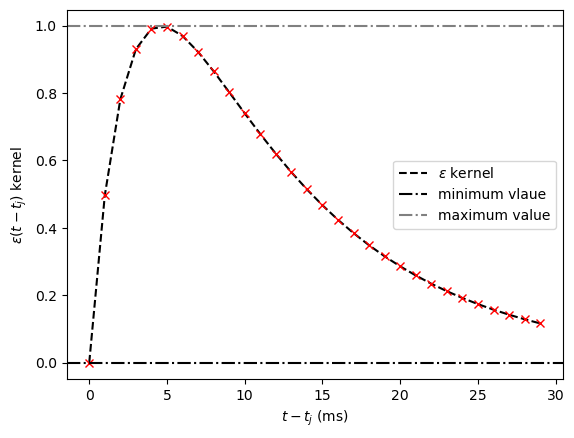

In [8]:
model.plot_kernel_('eps', 0.030, step_size=0.001)

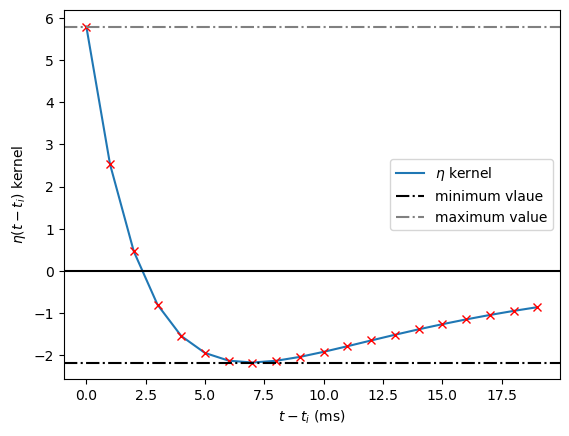

In [9]:
model.plot_kernel_('eta', 0.020, step_size=0.001)